<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_18_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.datasets import load_diabetes, load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from google.colab import drive
from sklearn.svm import NuSVC, SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


<h1> Метод опорных векторов для линейной регрессии

In [4]:
df = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', sep=';')

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
def correlation_matrix(self) -> None:    # Строит стандартную корреляционную матрицу
    plt.subplots(figsize=(10, 8))
    sns.heatmap(self.corr(), cmap='RdBu', annot=True, fmt=".2f")
    plt.xticks(range(len(self.corr().columns)), self.corr().columns);
    plt.yticks(range(len(self.corr().columns)), self.corr().columns)
    plt.title("Корреляционная матрица", fontsize=16)
    plt.show()

def compare_plot(self, column_x: int, column_y: int) -> None:   # Строит график зависимости по 2 параметрам. Ввод по индексу сравниваемых колонок
    plt.figure(figsize=(8, 6))
    title_x = self.columns[column_x]
    title_y = self.columns[column_y]
    plt.title("{} vs. \n{}".format(title_x, title_y), fontsize=13)
    sns.regplot(x=self[title_x], y=self[title_y])
    plt.grid(True)
    plt.xlabel(title_x, fontsize=11)
    plt.ylabel(title_y, fontsize=11)
    plt.show()

def compare_plots_to_parametr(self, column_y: int) -> None:    # Строит графики зависимости по всем параметрам с привязкой к column_y (индекс)
    for i in self.columns[:-1]:
      plt.figure(figsize=(8, 6))
      title_y = self.columns[column_y]
      plt.title("{} vs. \n{}".format(i, title_y), fontsize=13)
      sns.regplot(x=self[i], y=self[title_y])
      plt.grid(True)
      plt.xlabel(i, fontsize=11)
      plt.ylabel(title_y, fontsize=11)
      plt.show()

def top_correlations(self, top_n: int) -> None:        # Выводит top_n корреляционных пар
    correlation_matrix = self.corr()
    correlation_pairs = correlation_matrix.unstack()
    correlation_pairs = correlation_pairs.reset_index()
    correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]
    correlation_pairs['Ordered Pair'] = correlation_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis='columns')
    correlation_pairs = correlation_pairs.drop_duplicates(subset=['Ordered Pair'])
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(top_n):
      row = top_correlations.iloc[i]
      print(f"{i + 1}. {row['Variable 1']} AND {row['Variable 2']}: {row['Correlation']:.2f}")

def top_correlations_to_parametr(self, top_n: int, num_column: int) -> None:  # Выводит top_n корреляционных пар с привязкой к to_column
    correlation_matrix = self.corr()
    to_column = self.columns[num_column]
    correlation_pairs = correlation_matrix[[to_column]].reset_index()
    correlation_pairs.columns = ['Variable', 'Correlation']
    correlation_pairs = correlation_pairs[correlation_pairs['Variable'] != to_column]
    correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
    top_correlations = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)
    for i in range(min(top_n, len(top_correlations))):
        row = top_correlations.iloc[i]
        print(f"{i + 1}. {row['Variable']} AND {to_column}: {row['Correlation']:.2f}")

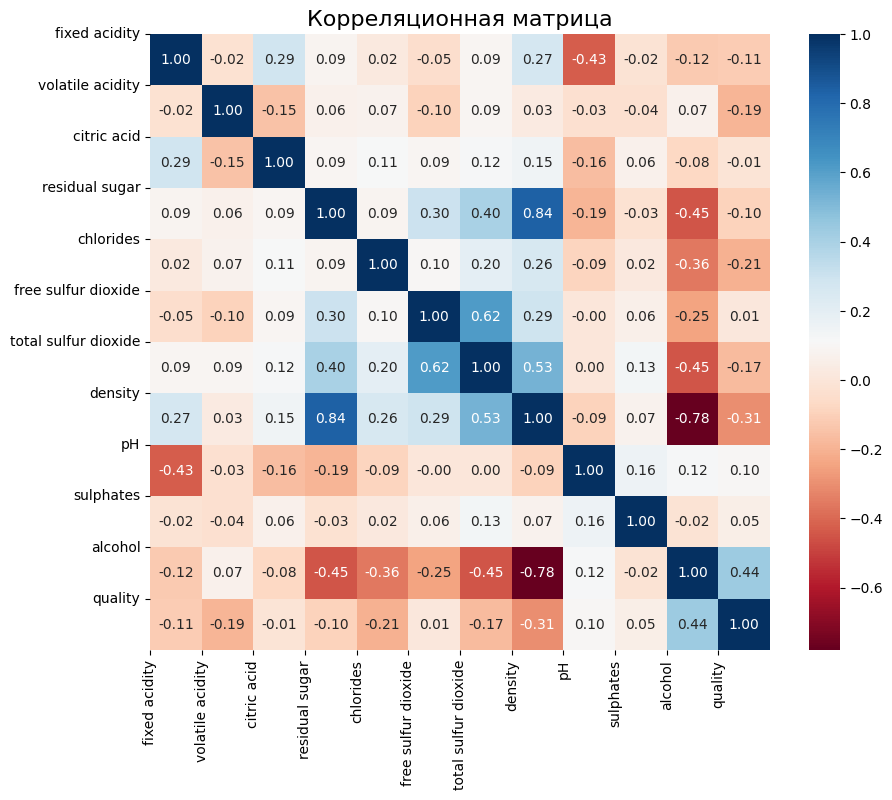

In [8]:
correlation_matrix(df)

In [9]:
top_correlations(df, 20)

1. residual sugar AND density: 0.84
2. density AND alcohol: -0.78
3. free sulfur dioxide AND total sulfur dioxide: 0.62
4. total sulfur dioxide AND density: 0.53
5. residual sugar AND alcohol: -0.45
6. total sulfur dioxide AND alcohol: -0.45
7. alcohol AND quality: 0.44
8. fixed acidity AND pH: -0.43
9. residual sugar AND total sulfur dioxide: 0.40
10. chlorides AND alcohol: -0.36
11. density AND quality: -0.31
12. residual sugar AND free sulfur dioxide: 0.30
13. free sulfur dioxide AND density: 0.29
14. fixed acidity AND citric acid: 0.29
15. fixed acidity AND density: 0.27
16. chlorides AND density: 0.26
17. free sulfur dioxide AND alcohol: -0.25
18. chlorides AND quality: -0.21
19. chlorides AND total sulfur dioxide: 0.20
20. volatile acidity AND quality: -0.19


In [10]:
# Разделяем X (признаки) и y (целевая переменная) для оценки качества вина
X = df.drop(columns=["quality"]).values
y = df["quality"].values

In [11]:
# Разделяем на тренировочную и тестовую выборки
X_train, X_test = X[:-20], X[-20:]
y_train, y_test = y[:-20], y[-20:]

In [12]:
# Масштабируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Создаем список с параметрами ядер
kernels = ["linear", "rbf", "poly"]
models = {}
predictions = {}

In [14]:
# Обучаем модели для каждого ядра
for kernel in kernels:
    model = SVR(kernel=kernel, C=100, epsilon=0.1)
    model.fit(X_train, y_train)
    models[kernel] = model
    predictions[kernel] = model.predict(X_test)

In [15]:
# Оцениваем результаты для каждого ядра
results = {}

for kernel in kernels:
    y_pred = predictions[kernel]
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[kernel] = {
        "MAE": mae,
        "MSE": mse
    }

In [16]:
# Выводим результаты
for kernel in kernels:
    print(f"Результат для {kernel} ядра:")
    print(f"MAE: {results[kernel]['MAE']:.3f}")
    print(f"MSE: {results[kernel]['MSE']:.3f}")
    print("-" * 30)

Результат для linear ядра:
MAE: 0.394
MSE: 0.203
------------------------------
Результат для rbf ядра:
MAE: 0.697
MSE: 0.780
------------------------------
Результат для poly ядра:
MAE: 0.476
MSE: 0.409
------------------------------


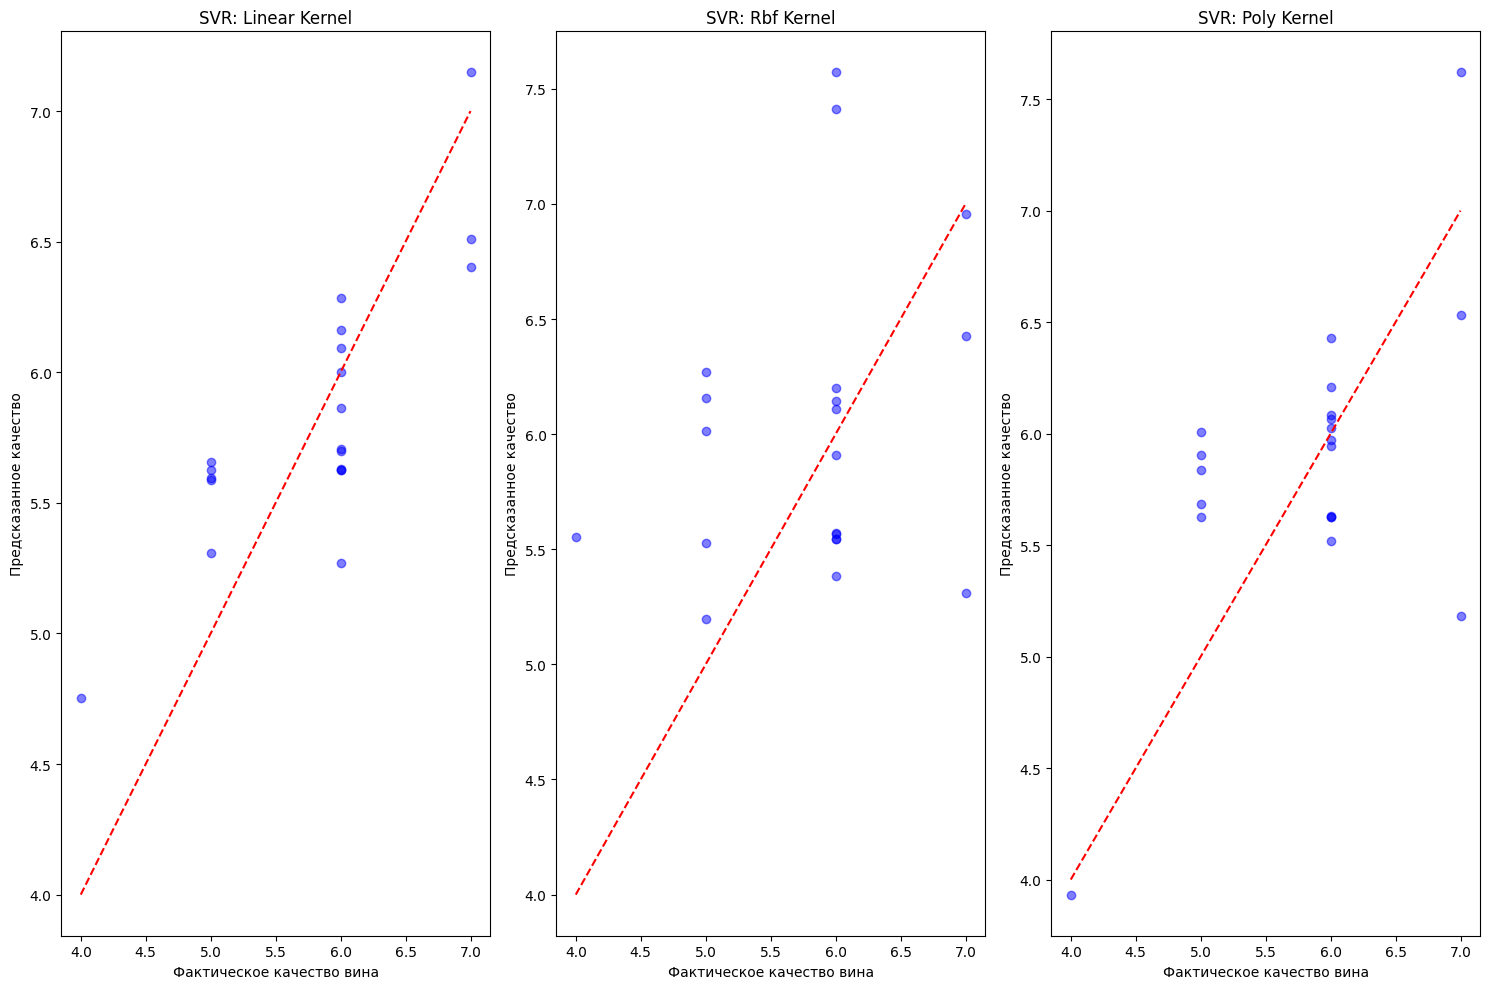

In [17]:
# Визуализируем предсказания для каждого ядра
plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernels):
    plt.subplot(1, 3, i+1)
    y_pred = predictions[kernel]
    plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
    plt.xlabel("Фактическое качество вина")
    plt.ylabel("Предсказанное качество")
    plt.title(f"SVR: {kernel.capitalize()} Kernel")

plt.tight_layout()
plt.show()

<h1> Метод опорных векторов для логистической регрессии

In [18]:
# Список ядер
kernels = ["linear", "rbf", "poly"]
models = {}
predictions = {}

# Обучаем модели
for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0)  # C регулирует регуляризацию
    model.fit(X_train, y_train)
    models[kernel] = model
    predictions[kernel] = model.predict(X_test)

In [19]:
# Вычисляем метрики
for kernel in kernels:
    y_pred = predictions[kernel]
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Ядро: {kernel}")
    print(f"Точность: {accuracy:.3f}")
    print("Отчет о классификации:")
    print(classification_report(y_test, y_pred))
    print("Матрица ошибок:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 40)

Ядро: linear
Точность: 0.500
Отчет о классификации:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.38      0.60      0.46         5
           6       0.58      0.64      0.61        11
           7       0.00      0.00      0.00         3

    accuracy                           0.50        20
   macro avg       0.24      0.31      0.27        20
weighted avg       0.41      0.50      0.45        20

Матрица ошибок:
[[0 1 0 0]
 [0 3 2 0]
 [0 4 7 0]
 [0 0 3 0]]
----------------------------------------
Ядро: rbf
Точность: 0.550
Отчет о классификации:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.25      0.40      0.31         5
           6       0.67      0.55      0.60        11
           7       1.00      1.00      1.00         3

    accuracy                           0.55        20
   macro avg       0.48      0.49   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

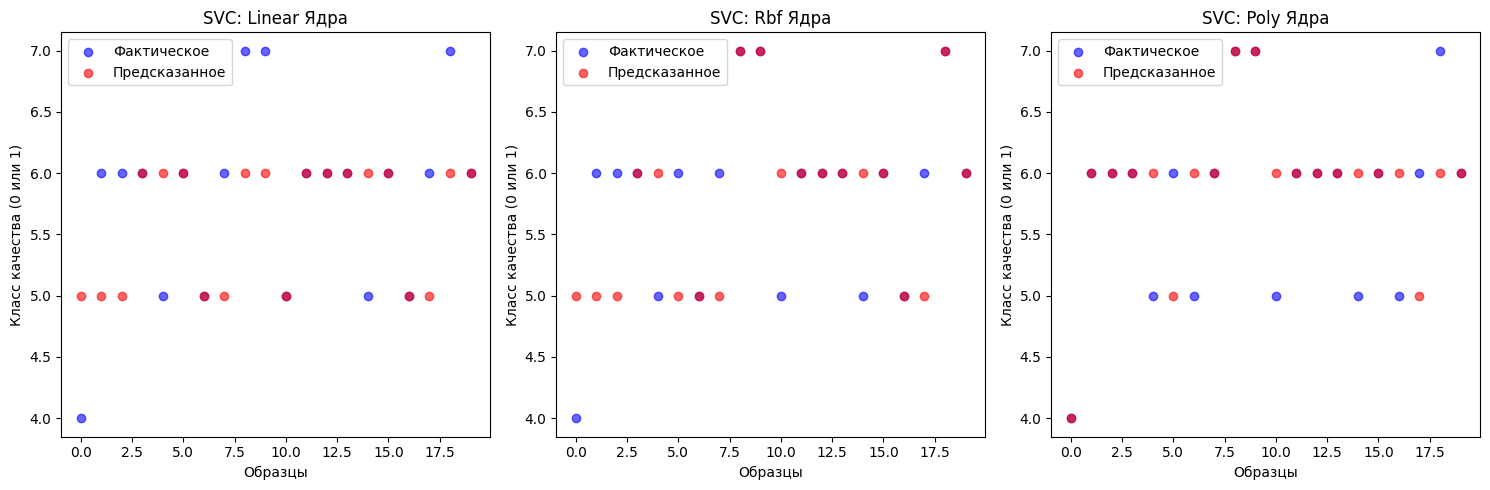

In [21]:
plt.figure(figsize=(15, 5))

for i, kernel in enumerate(kernels):
    plt.subplot(1, 3, i+1)
    y_pred = predictions[kernel]

    # Разброс предсказаний
    plt.scatter(range(len(y_test)), y_test, color="blue", label="Фактическое", alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, color="red", label="Предсказанное", alpha=0.6)

    plt.xlabel("Образцы")
    plt.ylabel("Класс качества (0 или 1)")
    plt.title(f"SVC: {kernel.capitalize()} Ядра")
    plt.legend()

plt.tight_layout()
plt.show()